<a href="https://colab.research.google.com/github/KoreTane/KoreTane/blob/main/ProfitForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ler a aba "Receita"
df_receita = pd.read_excel('fluxo_caixa_cbs.xlsx', sheet_name='Receita')

# Ler a aba "Despesa"
df_despesa = pd.read_excel('fluxo_caixa_cbs.xlsx', sheet_name='Despesa')

In [ ]:
df_despesa

,Data,Descrição,Valor,Tipo
0,2023-01-03,Sabesp,-59.46,Retirada pessoal
1,2023-01-05,EDP,-226.15,Despesas
2,2023-01-05,Sabesp,-119.15,Despesas
3,2023-01-09,EDP,-97.71,Retirada pessoal
4,2023-01-12,Internet,-140.12,Despesas
...,...,...,...,...
489,2024-04-23,Instalação bebedouro,-209.85,Reforma/Manutenção
490,2024-04-24,Suprimentos,-21.29,Despesas
491,2024-04-24,Suprimentos,-17.44,Despesas
492,2024-04-24,Tomada bebedouro,-26.90,Reforma/Manutenção


In [ ]:
df_receita

,Data,Descrição,Valor,Tipo
0,2023-01-11,#CLIENTE#23017,244.02,Débito
1,2023-01-12,#CLIENTE#23018,199.00,Dinheiro
2,2023-01-13,#CLIENTE#23002,237.12,Crédito
3,2023-01-13,#CLIENTE#23003,237.12,Crédito
4,2023-01-14,#CLIENTE#23007,250.00,Dinheiro
...,...,...,...,...
1306,2024-04-15,#CLIENTE#24024,230.00,Dinheiro
1307,2024-04-17,#CLIENTE#24024,164.07,Crédito
1308,2024-04-23,#CLIENTE#24023,316.89,Crédito
1309,2024-04-23,#CLIENTE#24023,358.34,Crédito


In [ ]:
# Agrupando por 'Tipo' e somando os 'Valor'
result_receita = df_receita.groupby('Tipo')['Valor'].sum().reset_index()
result_despesa = df_despesa.groupby('Tipo')['Valor'].sum().reset_index()

In [ ]:
result_despesa
result_receita

,Tipo,Valor
0,Aporte pessoal,522.13
1,Boleto,38017.52
2,Crédito,301170.75
3,Dinheiro,105575.28
4,Débito,6443.54
5,Espetáculo,28161.19
6,Investimento,81.62


In [ ]:
result_despesa

,Tipo,Valor
0,Despesas,-161024.25
1,Débito,-4076.38
2,Empréstimo,-54580.25
3,Impostos,-27555.00
4,Pró-labore,-22673.46
5,Reforma/Manutenção,-9738.55
6,Retirada pessoal,-44644.30
7,Salários,-176072.41
8,Tarifas Bancárias,-1312.64


In [ ]:
print(result_despesa)
print(result_receita)

                 Tipo      Valor
0            Despesas -161024.25
1              Débito   -4076.38
2          Empréstimo  -54580.25
3            Impostos  -27555.00
4          Pró-labore  -22673.46
5  Reforma/Manutenção   -9738.55
6    Retirada pessoal  -44644.30
7            Salários -176072.41
8   Tarifas Bancárias   -1312.64
             Tipo      Valor
0  Aporte pessoal     522.13
1          Boleto   38017.52
2         Crédito  301170.75
3        Dinheiro  105575.28
4          Débito    6443.54
5      Espetáculo   28161.19
6    Investimento      81.62


In [ ]:
despesa_agrupada = result_despesa.groupby('Tipo')['Valor'].sum().reset_index()

# Renomear a coluna para maior clareza
despesa_agrupada.columns = ['Tipo', 'Total_Valor']

# Exibir a matriz agrupada
print("Matriz de Despesa Agrupada:")
print(despesa_agrupada)

Matriz de Despesa Agrupada:
                 Tipo  Total_Valor
0            Despesas   -161024.25
1              Débito     -4076.38
2          Empréstimo    -54580.25
3            Impostos    -27555.00
4          Pró-labore    -22673.46
5  Reforma/Manutenção     -9738.55
6    Retirada pessoal    -44644.30
7            Salários   -176072.41
8   Tarifas Bancárias     -1312.64


In [ ]:
receita_agrupada = result_receita.groupby('Tipo')['Valor'].sum().reset_index()

# Renomear a coluna para maior clareza
receita_agrupada.columns = ['Tipo', 'Total_Valor']

# Exibir a matriz agrupada
print("Matriz de Receita Agrupada:")
print(receita_agrupada)

Matriz de Despesa Agrupada:
             Tipo  Total_Valor
0  Aporte pessoal       522.13
1          Boleto     38017.52
2         Crédito    301170.75
3        Dinheiro    105575.28
4          Débito      6443.54
5      Espetáculo     28161.19
6    Investimento        81.62


In [ ]:
# Filtrando as despesas
despesas = df_despesa[df_despesa['Tipo'] == 'Despesas']

# Extraindo a coluna 'Descrição'
result_despesa_descricao = despesas['Descrição'].reset_index(drop=True)

# Exibindo o resultado
result_despesa_descricao


0                      EDP
1                   Sabesp
2                 Internet
3                  Aluguel
4      Confecção de Flyers
              ...         
168         Anúncio Google
169          Contabilidade
170               Sisdança
171            Suprimentos
172            Suprimentos
Name: Descrição, Length: 173, dtype: object

ValueError: Could not interpret value `Valor` for `y`. An entry with this name does not appear in `data`.

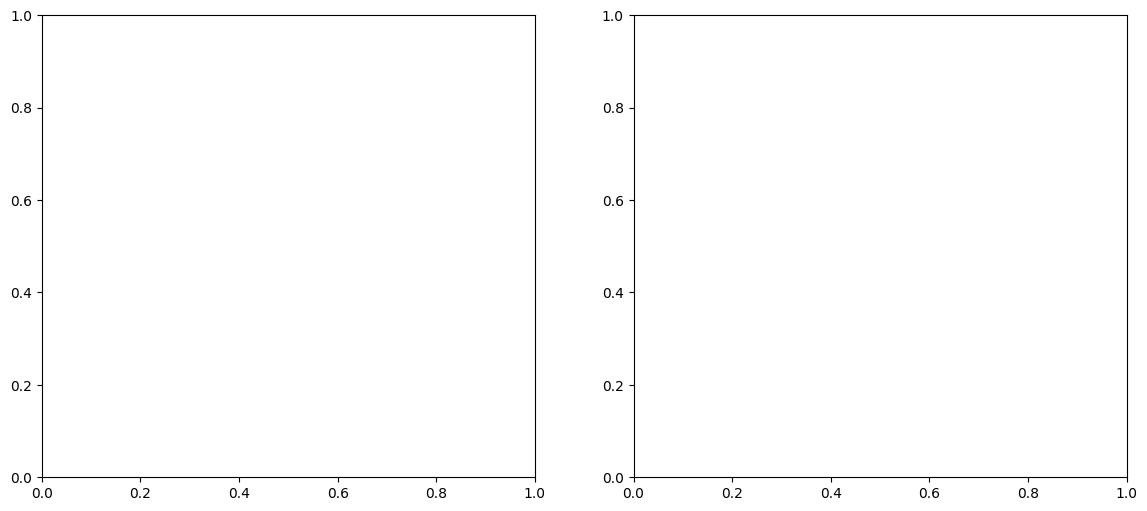

In [ ]:
# Criar uma figura com dois subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Receita
sns.barplot(x='Tipo', y='Valor', data=receita_agrupada, ax=axes[0], palette='Blues')
axes[0].set_title('Distribuição de Valores de Receita por Tipo')
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Valor Total')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Gráfico de Despesa
sns.barplot(x='Tipo', y='Valor', data=despesa_agrupada, ax=axes[1], palette='Reds')
axes[1].set_title('Distribuição de Valores de Despesa por Tipo')
axes[1].set_xlabel('Tipo')
axes[1].set_ylabel('Valor Total')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

In [ ]:
df_despesa[df_despesa['Tipo'] == 'Despesas'].groupby('Tipo')['Valor'].sum().reset_index()